In [1]:
import pandas as pd
import numpy as np
import gensim
from sklearn.linear_model import LogisticRegression
from gensim.models.doc2vec import TaggedDocument
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import roc_curve, roc_auc_score
from sklearn.naive_bayes import MultinomialNB
from sklearn.preprocessing import MinMaxScaler
from sklearn.pipeline import Pipeline
from sklearn.multiclass import OneVsRestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn import metrics
from sklearn.svm import SVC
from tqdm import tqdm
tqdm.pandas(desc="progress-bar")
from gensim.models import Doc2Vec
import multiprocessing
from sklearn import utils
from sklearn.model_selection import train_test_split
from gensim.parsing.preprocessing import remove_stopwords
from gensim.utils import simple_preprocess
from gensim.parsing.porter import PorterStemmer
from nltk.stem import WordNetLemmatizer
import re
from re import search
import nltk
nltk.download('wordnet')
nltk.download('averaged_perceptron_tagger')

[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\DELL\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     C:\Users\DELL\AppData\Roaming\nltk_data...
[nltk_data]   Package averaged_perceptron_tagger is already up-to-
[nltk_data]       date!


True

In [2]:
jdDataSet = pd.read_excel('jd_dataset_new.xlsx')
jdDataSet['cleaned_jd'] = ''
jdDataSet.head()

,title,description,skills,cleaned_jd
0,ux designer,Our client is seeking a UI/UX Designer. Loca...,"CSS, Development, HTML, HTTP, JavaScript, Mana...",
1,ux designer,Position Description:Wipro Digital is seeking ...,UX Designing,
2,ux designer,HIGreetings from Data inc!!! Hope you are doin...,"""ui designer"" , ""user interface designer"" , ""v...",
3,ux designer,Our team is looking for an experienced UI/UX D...,"HTML 5, CSS3, jQuery, php, bootstrap, Angular",
4,ux designer,"Hi, Please send me your updated resume on raje...",UX Designer,


In [3]:
print ("Displaying the distinct categories of jd -")
print (jdDataSet['title'].unique())

Displaying the distinct categories of jd -
['ux designer' 'infrastructure engineer' 'systems administrator'
 'ui developer' 'node .js developer' 'network engineer'
 'big data architect' 'android developer' 'salesforce developer'
 'ruby on rails developer' 'testing' 'network security administrator'
 'swift developer' 'application developer' 'data security analyst'
 'network support' 'technical support' 'data warehousing developer'
 'cloud architect' 'cloud infrastructure engineer' 'ios developer'
 'automation engineer' 'sql developer' 'qa engineer' 'telecom engineer'
 'php developer' 'site reliability engineer' 'hadoop developer'
 'aws architect' 'business analyst' 'data analyst' 'project manager'
 'technology analyst' 'java developer' 'devops engineer'
 'front end developer' 'back end developer' 'full stack developer'
 'software engineer' 'product manager' 'java engineer' '.net developer'
 'web developer' 'c# developer' 'c developer' 'c++ developer'
 'system engineer' 'database enginee

In [4]:
print ("Displaying the distinct categories of jd and the number of records belonging to each title -")
print (jdDataSet['title'].value_counts())

Displaying the distinct categories of jd and the number of records belonging to each title -
ux designer                       50
full stack developer              50
hadoop developer                  50
aws architect                     50
business analyst                  50
data analyst                      50
project manager                   50
technology analyst                50
java developer                    50
devops engineer                   50
front end developer               50
back end developer                50
software engineer                 50
infrastructure engineer           50
product manager                   50
java engineer                     50
.net developer                    50
web developer                     50
c# developer                      50
c developer                       50
c++ developer                     50
system engineer                   50
database engineer                 50
data scientist                    50
site reliability en

<AxesSubplot:xlabel='count', ylabel='title'>

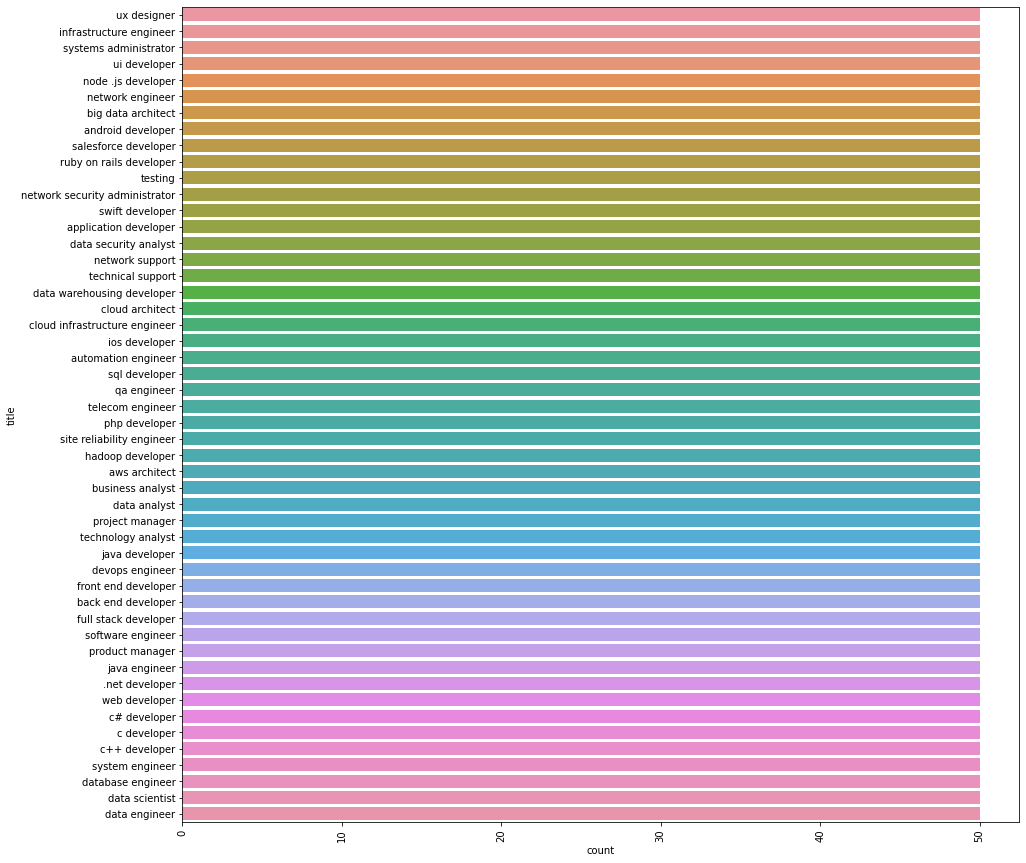

In [5]:
plt.figure(figsize=(15,15))
plt.xticks(rotation=90)
sns.countplot(y="title", data=jdDataSet)

In [6]:
def clean(text):
    text = re.sub('http\S+\s*', ' ', text)  # remove URLs
    text = re.sub('RT|cc', ' ', text)  # remove RT and cc
    text = re.sub('#\S+', '', text)  # remove hashtags
    text = re.sub('@\S+', '  ', text)  # remove mentions
    text = re.sub('[%s]' % re.escape("""!"$%&'()*,-/:;<=>?@[\]^_`{|}~"""), ' ', text)  # remove punctuations
    text = re.sub(r'[^\x00-\x7f]',r' ', text) 
    text = re.sub('\s+', ' ', text)  # remove extra whitespace
    return text

In [7]:
def extractNoun(wordsList):
    tagged = nltk.pos_tag(wordsList)
    filtered_pos = []
    for one in tagged:
        if one[1] == 'NN' or one[1] == 'NNS' or one[1] == 'NNP' or one[1] == 'NNPS':
            filtered_pos.append(one[0])
    return filtered_pos

In [8]:
skills = set()
skillDataSet = pd.read_excel('skills.xlsx')
for i in skillDataSet.index:
    if skillDataSet['frequency'][i] > 9:
        skills.add(skillDataSet['skills'][i])

def extractSkills(description):
    res = []
    for skill in skills:
        if str(skill) in description:
            res.append(skill)
    return res

In [9]:
#cleaning data
jdDataSet['cleaned_jd'] = jdDataSet.description.apply(lambda x: clean(x))

# Removing the stop words
jdDataSet['cleaned_jd'] = jdDataSet.cleaned_jd.apply(lambda x: remove_stopwords(x))

# Removing skills from job desctiption
jdDataSet['cleaned_jd'] = jdDataSet.cleaned_jd.apply(lambda x: extractSkills(x))

# Tokenize the text column
# jdDataSet['cleaned_jd'] = [simple_preprocess(line, deacc=True) for line in jdDataSet['cleaned_jd']] 

# Get the stemmed_tokens
# porter_stemmer = PorterStemmer()
# jdDataSet['cleaned_jd'] = [[porter_stemmer.stem(word) for word in tokens] for tokens in jdDataSet['cleaned_jd'] ]

# get the lammatized tokens
# lemmatizer = WordNetLemmatizer() 
# jdDataSet['cleaned_jd'] = [[lemmatizer.lemmatize(word) for word in tokens] for tokens in jdDataSet['cleaned_jd'] ]

# extract only noun 
# jdDataSet['cleaned_jd'] = jdDataSet.cleaned_jd.apply(lambda x: extractNoun(x))

jdDataSet['cleaned_jd']

0       [project, development, product management, web...
1       [manager, ssis, research, ios, web, it, archit...
2       [nan, project, ssis, engineer, ios, web, it, c...
3       [cloud, cisco, web, user interface, it, c, des...
4       [project, development, research, product manag...
                              ...                        
2495    [nan, big data, project, cloud, oop, data ware...
2496                                                  [r]
2497    [big data, cloud, oop, infrastructure, enginee...
2498    [cloud, scripting, oop, engineer, web, softwar...
2499    [nan, ssis, development, research, libraries, ...
Name: cleaned_jd, Length: 2500, dtype: object

In [10]:
# to generate N grams
def generate_N_grams(text,ngram=1):
    temp=zip(*[text[i:] for i in range(0,ngram)])
    ans=[' '.join(ngram) for ngram in temp]
    return ans

# jdDataSet['cleaned_jd'] = jdDataSet.cleaned_jd.apply(lambda x: x + generate_N_grams(list(x),3))

# jdDataSet['cleaned_jd'][0]

In [11]:
# to do classification only skilss
def extractSkills(string):
    if isinstance(string,float):
        return [" "," "]
    lst = string.split(',')
    lst = [s.strip() for s in lst]
    return lst

jdDataSet['cleaned_jd'] += jdDataSet.skills.apply(lambda x: list(extractSkills(x)) + list(extractSkills(x)))

# jdDataSet['cleaned_jd'][2]

In [12]:
train, test = train_test_split(jdDataSet, test_size=0.3, random_state=40)

train_tagged = train.apply( lambda r: TaggedDocument(words=r['cleaned_jd'], tags=[r.title]), axis=1)
test_tagged = test.apply( lambda r: TaggedDocument(words=r['cleaned_jd'], tags=[r.title]), axis=1)

train

,title,description,skills,cleaned_jd
644,swift developer,As a team member of the BESS/SWIFT Application...,swift,"[nan, project, development, infrastructure, it..."
847,technical support,GoAhead Solutions has an immediate need for a ...,"Desktop Support Analyst, Mac iOS, Windows OS, ...","[nan, project, ssis, project management, custo..."
1280,php developer,PHP Developer (Front-end) A exiting growing co...,"PHP, jQuery, , Front-end Development, Back-end...","[project, development, excel, it, c, programmi..."
2280,c++ developer,"Synechron, a recognized leader and expert in b...",C++ Developer,"[nan, data warehouse, it, architecture, c, pro..."
1778,front end developer,Sr.Front End Developer Modis is looking for a ...,Sr.Front End Developer,"[it, c, git, design, ui, browser, r, Sr.Front ..."
...,...,...,...,...
1863,full stack developer,Apex is seeking a Java/J2EE Software Engineer ...,GWT Hibernate Oracle SQL Java J2EE,"[html css, supervision, it, architecture, c, d..."
1330,site reliability engineer,"The SRE team works on coding, automating, and ...","API, Data Warehouse, Hadoop, Linux, Management...","[oop, data warehouse, infrastructure, it, c, u..."
2213,c developer,SCOPE OF SERVICES:A CMS developer will be resp...,"CMS, Java, Teamsite","[project, development, project management, sup..."
2055,.net developer,The Senior Developer will work closely with th...,.net; c#; asp.net; mvc; RESTful; WebAPI's; SQL...,"[business analyst, development, engineer, web,..."


In [13]:
test

,title,description,skills,cleaned_jd
2383,database engineer,"Role: Database EngineerLocation: Palo Alto, CA...","Apache Storm, Java, Linux","[scripts, python, oop, ssis, it, c, ux, ui, oo..."
1297,php developer,"PHP Developer Location: Atlanta, GASalary Rang...","PHP, CakePHP, Laravel, HTML5, CSS3, JQuery, An...","[nan, ssis, development, engineer, it, c, desi..."
2,ux designer,HIGreetings from Data inc!!! Hope you are doin...,"""ui designer"" , ""user interface designer"" , ""v...","[nan, project, ssis, engineer, ios, web, it, c..."
1647,technology analyst,Infosys Digital Experience Technology Analyst ...,"Drupal 7.x,PHP, Programmer","[lifecycle, development, excel, engineer, it, ..."
1356,hadoop developer,"Dear Candidate,For our client, a major company...",Big Data Hadoop Hive Pig MapReduce Spark Scala...,"[oop, metrics, etl, it, c, rest, ui, r, api, s..."
...,...,...,...,...
1931,software engineer,Client: Xavient/ Sling TVLocation: American Fo...,10 years of professional enterprise and Postgr...,"[cloud, development, web, it, architecture, c,..."
649,swift developer,As a team member of the BESS/SWIFT Application...,swift,"[nan, project, development, infrastructure, it..."
293,network engineer,Duties and ResponsibilitiesIn this F5 Load Bal...,"IP Routing (BGP & OSPF), SSL Termination; Ethe...","[router, infrastructure, engineer, it, c, desi..."
502,testing,"Role: AB TestingLocation: San Bruno, CAFull T...","A/B, MVT tests, Retail, ecommerce","[nan, project, excel, project management, web,..."


In [14]:
cores = multiprocessing.cpu_count()

In [15]:
model_dbow = Doc2Vec(dm=0, vector_size=300, negative=5, hs=0, min_count=2, sample = 0, workers=cores,alpha=0.065, min_alpha=0.065)
model_dbow.build_vocab([x for x in tqdm(train_tagged.values)])
model_dbow['java developer']

100%|██████████| 1750/1750 [00:00<00:00, 863838.06it/s]


array([ 2.23742961e-03,  1.89470930e-03,  2.25348165e-03,  2.13084137e-03,
        1.75881386e-03,  2.01930595e-03,  9.10008734e-04, -2.42663152e-03,
       -3.07511096e-03,  2.89841974e-03,  2.85628089e-03,  2.85240170e-03,
        1.70091388e-03,  7.80374976e-04, -2.12991703e-03,  3.30878026e-03,
       -6.21895015e-04, -2.42016464e-03,  3.03927256e-04,  1.04176207e-03,
        5.22669929e-04, -1.98262464e-03, -2.50674249e-03,  2.16893991e-03,
       -1.62727514e-03,  2.93948175e-03,  3.12334625e-03, -1.39861106e-04,
       -5.14285581e-04,  4.60556359e-04, -2.10257922e-03,  2.23298720e-03,
        1.84464687e-03,  1.08514552e-03,  8.81273765e-04, -2.90272082e-03,
        2.53464305e-03,  2.76705832e-03, -1.40194898e-04, -1.99437863e-03,
        6.91867666e-04,  2.49203527e-03,  2.56379440e-06,  2.96317739e-04,
       -1.35694188e-03,  2.61255889e-04,  1.87914772e-03,  7.17547722e-04,
        1.72904250e-03,  2.72268942e-03, -7.06175982e-04, -7.30224478e-04,
        2.28521670e-03, -

In [16]:
%%time
for epoch in range(30):
    model_dbow.train(utils.shuffle([x for x in tqdm(train_tagged.values)]), total_examples=len(train_tagged.values), epochs=1)
    model_dbow.alpha -= 0.002
    model_dbow.min_alpha = model_dbow.alpha

100%|██████████| 1750/1750 [00:00<00:00, 1744718.80it/s]


Wall time: 2.44 s


In [17]:
def vec_for_learning(model, tagged_docs):
    sents = tagged_docs.values
    targets, regressors = zip(*[(doc.tags[0], model.infer_vector(doc.words,alpha=0.065)) for doc in sents])
    return targets, regressors

In [18]:
y_train, X_train = vec_for_learning(model_dbow, train_tagged)
y_test, X_test = vec_for_learning(model_dbow, test_tagged)

logreg = LogisticRegression(n_jobs=1, C=1e10,max_iter=30000)
logreg.fit(X_train, y_train)
y_pred = logreg.predict(X_test)

from sklearn.metrics import accuracy_score, f1_score

print('Testing accuracy %s' % accuracy_score(y_test, y_pred))
print('Testing F1 score: {}'.format(f1_score(y_test, y_pred, average='weighted')))

TypeError: sequence item 0: expected str instance, float found

In [ ]:
model_dmm = Doc2Vec(dm=1, dm_mean=1, vector_size=300, window=10, negative=5, min_count=1, workers=5, alpha=0.065, min_alpha=0.065)
model_dmm.build_vocab([x for x in tqdm(train_tagged.values)])

In [ ]:
%%time
for epoch in range(30):
    model_dmm.train(utils.shuffle([x for x in tqdm(train_tagged.values)]), total_examples=len(train_tagged.values), epochs=1)
    model_dmm.alpha -= 0.002
    model_dmm.min_alpha = model_dmm.alpha

In [ ]:
y_train, X_train = vec_for_learning(model_dmm, train_tagged)
y_test, X_test = vec_for_learning(model_dmm, test_tagged)
logreg.fit(X_train, y_train)
y_pred = logreg.predict(X_test)
print('Testing accuracy %s' % accuracy_score(y_test, y_pred))
print('Testing F1 score: {}'.format(f1_score(y_test, y_pred, average='weighted')))

In [ ]:
# model_dbow.delete_temporary_training_data(keep_doctags_vectors=True, keep_inference=True)
# model_dmm.delete_temporary_training_data(keep_doctags_vectors=True, keep_inference=True)

In [ ]:
# from gensim.test.test_doc2vec import ConcatenatedDoc2Vec
class ConcatenatedDocvecs(object):
    def __init__(self, models):
        self.models = models

    def __getitem__(self, token):
        return np.concatenate([model[token] for model in self.models])

class ConcatenatedDoc2Vec(object):
    """
    Concatenation of multiple models for reproducing the Paragraph Vectors paper.
    Models must have exactly-matching vocabulary and document IDs. (Models should
    be trained separately; this wrapper just returns concatenated results.)
    """

    def __init__(self, models):
        self.models = models
        if hasattr(models[0], 'docvecs'):
            self.docvecs = ConcatenatedDocvecs([model.docvecs for model in models])

    def __getitem__(self, token):
        return np.concatenate([model[token] for model in self.models])

    def infer_vector(self, document, alpha=0.065, min_alpha=0.065, steps=20):
        return np.concatenate([model.infer_vector(document, alpha, min_alpha, steps) for model in self.models])

    def train(self, *ignore_args, **ignore_kwargs):
        pass  # train subcomponents individually

new_model = ConcatenatedDoc2Vec([model_dbow, model_dmm])

In [ ]:
def get_vectors(model, tagged_docs):
    sents = tagged_docs.values
    targets, regressors = zip(*[(doc.tags[0], model.infer_vector(doc.words, steps=20,alpha=0.065)) for doc in sents])
    return targets, regressors

In [ ]:
y_train, X_train = get_vectors(new_model, train_tagged)
y_test, X_test = get_vectors(new_model, test_tagged)
logreg.fit(X_train, y_train)
y_pred = logreg.predict(X_test)
print('Testing accuracy %s' % accuracy_score(y_test, y_pred))
print('Testing F1 score: {}'.format(f1_score(y_test, y_pred, average='weighted')))

In [ ]:
# temprory use
# y_test = np.asarray(y_test)

# matchedJdsindexList = []

# for i, _ in np.ndenumerate(y_test):
#   if y_test[i]==y_pred[i]:
#     matchedJdsindexList.append(i[0])


# # importing random module
# import random

# for idx in random.sample(matchedJdsindexList, 10):
#   print('jd number :',idx+2)
#   print('\n')
#   print('title')
#   print(jdDataSet['title'][idx])
#   print('\n')
#   print('description')
#   print(jdDataSet['description'][idx])
#   print('\n')
#   print('skills')
#   print(jdDataSet['skills'][idx])
#   print('--------------------------------------------------')


In [ ]:
# "Support Vector Classifier"
  
clf = SVC(kernel='linear') 

# fitting x samples and y classes 
clf.fit(X_train, y_train)

y_pred = clf.predict(X_test)

print('Testing accuracy %s' % accuracy_score(y_test, y_pred))
print('Testing F1 score: {}'.format(f1_score(y_test, y_pred, average='weighted')))

In [ ]:
clf2 = SVC(kernel='poly', degree=2,probability=True)
clf2.fit(X_train, y_train)

y_pred = clf2.predict(X_test)

print('Testing accuracy %s' % accuracy_score(y_test, y_pred))
print('Testing F1 score: {}'.format(f1_score(y_test, y_pred, average='weighted')))

In [ ]:
kNeighbors = OneVsRestClassifier(KNeighborsClassifier(5))
kNeighbors.fit(X_train, y_train)
prediction = kNeighbors.predict(X_test)

print('Testing accuracy %s' % accuracy_score(y_test, prediction))
print('Testing F1 score: {}'.format(f1_score(y_test, prediction, average='weighted')))

print('Accuracy of KNeighbors Classifier on training set: {}'.format(kNeighbors.score(X_train, y_train)))
print('Accuracy of KNeighbors Classifier on test set: {}'.format(kNeighbors.score(X_test, y_test)))
print("\n Classification report for classifier %s:\n%s\n" % (kNeighbors, metrics.classification_report(y_test, prediction)))

In [ ]:
lastModel = Pipeline([('Normalizing',MinMaxScaler()),('MultinomialNB',MultinomialNB())])
lastModel.fit(X_train, y_train)
prediction = lastModel.predict(X_test)

print('Testing accuracy %s' % accuracy_score(y_test, prediction))
print('Testing F1 score: {}'.format(f1_score(y_test, prediction, average='weighted')))

In [ ]:
# roc = {label: [] for label in jdDataSet['title'].unique()}
# for label in jdDataSet['title'].unique():
#     clf2.fit(X_train,y_train)
#     predictions_proba = clf2.predict_proba(X_test)
#     roc[label] += roc_auc_score(predictions_proba[:,1],y_test)
#     print(roc[label])

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from scipy.sparse import hstack

requiredText = jdDataSet['cleaned_jd'].values
requiredTarget = jdDataSet['title'].values

def dummy(doc):
    return doc

vectorizer = TfidfVectorizer(tokenizer=dummy,preprocessor=dummy)
vectorizer.fit(requiredText)
WordFeatures = vectorizer.transform(requiredText)

In [ ]:
X_train,X_test,y_train,y_test = train_test_split(WordFeatures,requiredTarget,random_state=0, test_size=0.3)

clf = OneVsRestClassifier(KNeighborsClassifier())
clf.fit(X_train, y_train)
prediction = clf.predict(X_test)
print('Accuracy of KNeighbors Classifier on training set: {:.2f}'.format(clf.score(X_train, y_train)))
print('Accuracy of KNeighbors Classifier on test set: {:.2f}'.format(clf.score(X_test, y_test)))

In [ ]:
# model_dbow = Doc2Vec(dm=0, vector_size=300, negative=5, hs=0, min_count=2, sample = 0, workers=cores,alpha=0.065, min_alpha=0.065)
# model_dbow.build_vocab([x for x in tqdm(train_tagged.values)])
# model_dbow['java developer']